In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np 
import scipy as sp 
import sklearn
from imblearn.over_sampling import RandomOverSampler
import random 
from sklearn.preprocessing import MinMaxScaler
import time 
from sklearn import preprocessing, model_selection
from keras.models import Sequential 
from keras.layers import Dense 
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
from sklearn.utils import shuffle
from keras.layers import Embedding, LSTM, SpatialDropout1D
data = pd.read_csv('camelversion.csv')
#data = shuffle(data)

C:\Users\SUSHANT\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\SUSHANT\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.
C:\Users\SUSHANT\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as

In [2]:
#data = data.drop(['name', 'version', 'name'], axis =1)
X = data.drop(['bug'], axis = 1)
X = np.array(X)
Y = data['bug']
Y.shape

(2784,)

In [3]:
scaler = MinMaxScaler()
MinMaxScaler(copy=True, feature_range=(0, 1))
cols_to_norm = ['wmc', 'dit', 'noc', 'cbo', 'rfc', 'lcom', 'ca', 'ce', 'npm', 'lcom3', 'loc', 'dam', 'moa', 'mfa', 'cam', 'ic', 'cbm', 'amc', 'max_cc', 'avg_cc']
data[cols_to_norm] = MinMaxScaler().fit_transform(data[cols_to_norm])
print(data.head())

        wmc       dit       noc       cbo       rfc      lcom        ca  \
0  0.024096  0.333333  0.000000  0.013393  0.024845  0.000441  0.004484   
1  0.036145  0.500000  0.000000  0.046875  0.102484  0.001102  0.002242   
2  0.012048  0.500000  0.000000  0.006696  0.021739  0.000073  0.000000   
3  0.156627  0.166667  0.025641  0.022321  0.145963  0.000000  0.011211   
4  0.024096  0.500000  0.000000  0.008929  0.059006  0.000441  0.002242   

         ce       npm  lcom3  ...  dam       moa       mfa       cam    ic  \
0  0.065789  0.025478   1.00  ...  0.0  0.000000  0.896552  0.500000  0.00   
1  0.276316  0.012739   1.00  ...  0.0  0.000000  0.800000  0.500000  0.50   
2  0.039474  0.006369   1.00  ...  0.0  0.000000  0.833333  0.666667  0.25   
3  0.065789  0.152866   0.04  ...  1.0  0.111111  0.000000  0.258242  0.00   
4  0.052632  0.019108   1.00  ...  0.0  0.000000  0.888889  0.375000  0.25   

        cbm       amc    max_cc    avg_cc  bug  
0  0.000000  0.034664  0.030303

In [4]:
scaler = MinMaxScaler()
MinMaxScaler(copy=True, feature_range=(0, 1))
cols_to_norm = ['wmc', 'dit', 'noc', 'cbo', 'rfc', 'lcom', 'ca', 'ce', 'npm', 'lcom3', 'loc', 'dam', 'moa', 'mfa', 'cam', 'ic', 'cbm', 'amc', 'max_cc', 'avg_cc']
data[cols_to_norm] = MinMaxScaler().fit_transform(data[cols_to_norm])
print(data.head())

        wmc       dit       noc       cbo       rfc      lcom        ca  \
0  0.024096  0.333333  0.000000  0.013393  0.024845  0.000441  0.004484   
1  0.036145  0.500000  0.000000  0.046875  0.102484  0.001102  0.002242   
2  0.012048  0.500000  0.000000  0.006696  0.021739  0.000073  0.000000   
3  0.156627  0.166667  0.025641  0.022321  0.145963  0.000000  0.011211   
4  0.024096  0.500000  0.000000  0.008929  0.059006  0.000441  0.002242   

         ce       npm  lcom3  ...  dam       moa       mfa       cam    ic  \
0  0.065789  0.025478   1.00  ...  0.0  0.000000  0.896552  0.500000  0.00   
1  0.276316  0.012739   1.00  ...  0.0  0.000000  0.800000  0.500000  0.50   
2  0.039474  0.006369   1.00  ...  0.0  0.000000  0.833333  0.666667  0.25   
3  0.065789  0.152866   0.04  ...  1.0  0.111111  0.000000  0.258242  0.00   
4  0.052632  0.019108   1.00  ...  0.0  0.000000  0.888889  0.375000  0.25   

        cbm       amc    max_cc    avg_cc  bug  
0  0.000000  0.034664  0.030303

C:\Users\SUSHANT\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Train on 1558 samples, validate on 669 samples
Epoch 1/200
1558/1558 [==============================] - 2s 1ms/step - loss: 3.1601 - accuracy: 0.6181 - mse: 2.8592 - mae: 0.4991 - mape: 21736136.0000 - cosine: 1.1466 - val_loss: 2.0008 - val_accuracy: 0.7773 - val_mse: 2.5191 - val_mae: 0.5397 - val_mape: 21007576.0000 - val_cosine: 0.8982
Epoch 2/200
1558/1558 [==============================] - 0s 176us/step - loss: 1.1875 - accuracy: 0.8042 - mse: 2.8719 - mae: 0.4991 - mape: 21736132.0000 - cosine: 0.3798 - val_loss: 0.9939 - val_accuracy: 0.7773 - val_mse: 2.5372 - val_mae: 0.5397 - val_mape: 21007576.0000 - val_cosine: 0.2643
Epoch 3/200
1558/1558 [==============================] - 0s 180us/step - loss: 0.8652 - accuracy: 0.8042 - mse: 2.8763 - mae: 0.4991 - mape: 21736134.0000 - cosine: 0.2464 - val_loss: 0.9121 - val_accuracy: 0.7773 - val_mse: 2.5349 - val_mae: 0.5397 - val_mape: 21007576.0000 - val_cosine: 0.2780
Epoch 4/200
1558/1558 [==============================] - 0s 198u

1558/1558 [==============================] - 0s 232us/step - loss: 0.7576 - accuracy: 0.8042 - mse: 2.8763 - mae: 0.4991 - mape: 21736134.0000 - cosine: 0.2572 - val_loss: 0.8645 - val_accuracy: 0.7773 - val_mse: 2.5360 - val_mae: 0.5397 - val_mape: 21007574.0000 - val_cosine: 0.2758
Epoch 29/200
1558/1558 [==============================] - 0s 194us/step - loss: 0.7559 - accuracy: 0.8042 - mse: 2.8761 - mae: 0.4991 - mape: 21736132.0000 - cosine: 0.2615 - val_loss: 0.8618 - val_accuracy: 0.7773 - val_mse: 2.5360 - val_mae: 0.5397 - val_mape: 21007574.0000 - val_cosine: 0.2782
Epoch 30/200
1558/1558 [==============================] - 0s 192us/step - loss: 0.7518 - accuracy: 0.8049 - mse: 2.8764 - mae: 0.4991 - mape: 21736134.0000 - cosine: 0.2597 - val_loss: 0.8656 - val_accuracy: 0.7773 - val_mse: 2.5361 - val_mae: 0.5397 - val_mape: 21007576.0000 - val_cosine: 0.2763
Epoch 31/200
1558/1558 [==============================] - 0s 198us/step - loss: 0.7523 - accuracy: 0.8042 - mse: 2.8767

1558/1558 [==============================] - 0s 195us/step - loss: 0.7416 - accuracy: 0.8055 - mse: 2.8762 - mae: 0.4991 - mape: 21736136.0000 - cosine: 0.2623 - val_loss: 0.8603 - val_accuracy: 0.7758 - val_mse: 2.5359 - val_mae: 0.5397 - val_mape: 21007576.0000 - val_cosine: 0.2850
Epoch 56/200
1558/1558 [==============================] - 0s 179us/step - loss: 0.7411 - accuracy: 0.8049 - mse: 2.8766 - mae: 0.4991 - mape: 21736134.0000 - cosine: 0.2613 - val_loss: 0.8560 - val_accuracy: 0.7758 - val_mse: 2.5353 - val_mae: 0.5397 - val_mape: 21007574.0000 - val_cosine: 0.2878
Epoch 57/200
1558/1558 [==============================] - 0s 191us/step - loss: 0.7385 - accuracy: 0.8055 - mse: 2.8767 - mae: 0.4991 - mape: 21736132.0000 - cosine: 0.2599 - val_loss: 0.8582 - val_accuracy: 0.7758 - val_mse: 2.5353 - val_mae: 0.5397 - val_mape: 21007576.0000 - val_cosine: 0.2853
Epoch 58/200
1558/1558 [==============================] - 0s 203us/step - loss: 0.7428 - accuracy: 0.8042 - mse: 2.8763

1558/1558 [==============================] - 0s 307us/step - loss: 0.7358 - accuracy: 0.8062 - mse: 2.8769 - mae: 0.4991 - mape: 21736132.0000 - cosine: 0.2581 - val_loss: 0.8526 - val_accuracy: 0.7758 - val_mse: 2.5359 - val_mae: 0.5397 - val_mape: 21007576.0000 - val_cosine: 0.2843
Epoch 83/200
1558/1558 [==============================] - 0s 262us/step - loss: 0.7413 - accuracy: 0.8055 - mse: 2.8764 - mae: 0.4991 - mape: 21736134.0000 - cosine: 0.2646 - val_loss: 0.8450 - val_accuracy: 0.7758 - val_mse: 2.5359 - val_mae: 0.5397 - val_mape: 21007576.0000 - val_cosine: 0.2920
Epoch 84/200
1558/1558 [==============================] - 0s 261us/step - loss: 0.7321 - accuracy: 0.8049 - mse: 2.8765 - mae: 0.4991 - mape: 21736136.0000 - cosine: 0.2641 - val_loss: 0.8518 - val_accuracy: 0.7758 - val_mse: 2.5362 - val_mae: 0.5397 - val_mape: 21007576.0000 - val_cosine: 0.2809
Epoch 85/200
1558/1558 [==============================] - 0s 246us/step - loss: 0.7289 - accuracy: 0.8068 - mse: 2.8766

1558/1558 [==============================] - 0s 195us/step - loss: 0.7303 - accuracy: 0.8055 - mse: 2.8762 - mae: 0.4991 - mape: 21736134.0000 - cosine: 0.2711 - val_loss: 0.8626 - val_accuracy: 0.7773 - val_mse: 2.5366 - val_mae: 0.5397 - val_mape: 21007574.0000 - val_cosine: 0.2798
Epoch 110/200
1558/1558 [==============================] - 0s 183us/step - loss: 0.7185 - accuracy: 0.8049 - mse: 2.8765 - mae: 0.4991 - mape: 21736136.0000 - cosine: 0.2649 - val_loss: 0.8698 - val_accuracy: 0.7758 - val_mse: 2.5366 - val_mae: 0.5397 - val_mape: 21007576.0000 - val_cosine: 0.2767
Epoch 111/200
1558/1558 [==============================] - 0s 192us/step - loss: 0.7319 - accuracy: 0.8049 - mse: 2.8766 - mae: 0.4991 - mape: 21736136.0000 - cosine: 0.2615 - val_loss: 0.8596 - val_accuracy: 0.7758 - val_mse: 2.5361 - val_mae: 0.5397 - val_mape: 21007574.0000 - val_cosine: 0.2811
Epoch 112/200
1558/1558 [==============================] - 0s 192us/step - loss: 0.7253 - accuracy: 0.8049 - mse: 2.8

1558/1558 [==============================] - 0s 216us/step - loss: 0.7149 - accuracy: 0.8042 - mse: 2.8768 - mae: 0.4991 - mape: 21736132.0000 - cosine: 0.2672 - val_loss: 0.8329 - val_accuracy: 0.7758 - val_mse: 2.5357 - val_mae: 0.5397 - val_mape: 21007576.0000 - val_cosine: 0.2972
Epoch 137/200
1558/1558 [==============================] - 0s 210us/step - loss: 0.7193 - accuracy: 0.8055 - mse: 2.8765 - mae: 0.4991 - mape: 21736136.0000 - cosine: 0.2700 - val_loss: 0.8504 - val_accuracy: 0.7758 - val_mse: 2.5366 - val_mae: 0.5397 - val_mape: 21007576.0000 - val_cosine: 0.2860
Epoch 138/200
1558/1558 [==============================] - 0s 199us/step - loss: 0.7152 - accuracy: 0.8042 - mse: 2.8770 - mae: 0.4991 - mape: 21736132.0000 - cosine: 0.2677 - val_loss: 0.8365 - val_accuracy: 0.7758 - val_mse: 2.5360 - val_mae: 0.5397 - val_mape: 21007574.0000 - val_cosine: 0.2946
Epoch 139/200
1558/1558 [==============================] - 0s 196us/step - loss: 0.7109 - accuracy: 0.8049 - mse: 2.8

1558/1558 [==============================] - 0s 218us/step - loss: 0.7082 - accuracy: 0.8049 - mse: 2.8766 - mae: 0.4991 - mape: 21736132.0000 - cosine: 0.2722 - val_loss: 0.8485 - val_accuracy: 0.7758 - val_mse: 2.5358 - val_mae: 0.5397 - val_mape: 21007576.0000 - val_cosine: 0.2933
Epoch 164/200
1558/1558 [==============================] - 0s 218us/step - loss: 0.7139 - accuracy: 0.8049 - mse: 2.8769 - mae: 0.4991 - mape: 21736134.0000 - cosine: 0.2661 - val_loss: 0.8482 - val_accuracy: 0.7758 - val_mse: 2.5357 - val_mae: 0.5397 - val_mape: 21007576.0000 - val_cosine: 0.2930
Epoch 165/200
1558/1558 [==============================] - 0s 209us/step - loss: 0.7083 - accuracy: 0.8068 - mse: 2.8763 - mae: 0.4991 - mape: 21736130.0000 - cosine: 0.2737 - val_loss: 0.8468 - val_accuracy: 0.7758 - val_mse: 2.5360 - val_mae: 0.5397 - val_mape: 21007574.0000 - val_cosine: 0.2934
Epoch 166/200
1558/1558 [==============================] - 0s 214us/step - loss: 0.7084 - accuracy: 0.8062 - mse: 2.8

1558/1558 [==============================] - 0s 222us/step - loss: 0.7035 - accuracy: 0.8049 - mse: 2.8766 - mae: 0.4991 - mape: 21736134.0000 - cosine: 0.2742 - val_loss: 0.8367 - val_accuracy: 0.7758 - val_mse: 2.5353 - val_mae: 0.5397 - val_mape: 21007574.0000 - val_cosine: 0.3051
Epoch 191/200
1558/1558 [==============================] - 0s 199us/step - loss: 0.7027 - accuracy: 0.8068 - mse: 2.8766 - mae: 0.4991 - mape: 21736134.0000 - cosine: 0.2753 - val_loss: 0.8399 - val_accuracy: 0.7758 - val_mse: 2.5355 - val_mae: 0.5397 - val_mape: 21007576.0000 - val_cosine: 0.3008
Epoch 192/200
1558/1558 [==============================] - 0s 198us/step - loss: 0.7065 - accuracy: 0.8042 - mse: 2.8768 - mae: 0.4991 - mape: 21736132.0000 - cosine: 0.2721 - val_loss: 0.8548 - val_accuracy: 0.7758 - val_mse: 2.5360 - val_mae: 0.5397 - val_mape: 21007576.0000 - val_cosine: 0.2943
Epoch 193/200
1558/1558 [==============================] - 0s 208us/step - loss: 0.6997 - accuracy: 0.8062 - mse: 2.8

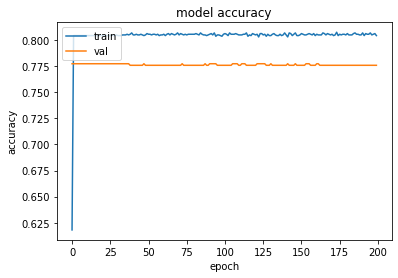

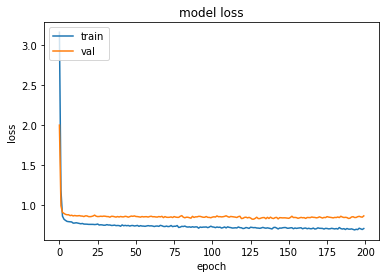

In [13]:
ros = RandomOverSampler(random_state=0)
X_resampled, Y_resampled = ros.fit_resample(X, Y)
train_x, test_x, train_y, test_y = model_selection.train_test_split(X,Y,test_size = 0.2, random_state = 0)
train_x = np.reshape(train_x, (train_x.shape[0], 1, train_x.shape[1]))
test_x = np.reshape(test_x, (test_x.shape[0], 1, test_x.shape[1]))
input_dim = len(data.columns) - 1
model = Sequential()
#model.add(Embedding(1024, 1, input_length=20))
model.add(LSTM(50, input_shape = (1,20), dropout = 0.2, return_sequences=True))
#model.add(LSTM(512, dropout = 0.3, return_sequences=True))
#model.add(LSTM(256, dropout = 0.4, return_sequences=True))
#model.add(LSTM(25, dropout = 0.2, return_sequences=True))
model.add(LSTM(40, dropout = 0.2, return_sequences=False))
#model.add(LSTM(16, input_shape=(1,20), dropout = 0.67))
#model.add(Dense(1, activation='softmax'))
#model.add(SpatialDropout1D(0.7))
#model.add(LSTM(64, dropout=0.7))
#model.add(LSTM(16, dropout=0.7, return_sequences=True))
#model.add(LSTM(8, dropout=0.7))
#model.add(Dense(10, input_dim = input_dim , activation = 'relu'))
#model.add(Dense(10, activation = 'relu'))
#model.add(Dense(8, activation = 'relu'))
#model.add(Dense(8, activation = 'relu'))
#model.add(Dense(6, activation = 'relu'))
#model.add(Dense(32, activation = 'softmax'))
model.add(Dense(37, activation = 'softmax'))
model.compile(loss = 'sparse_categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy','mse', 'mae', 'mape', 'cosine'] )
history = model.fit(train_x, train_y, validation_split = 0.3, epochs = 200, batch_size = 32)
score = model.evaluate(test_x, test_y)
print(history.history.keys())
model.test_on_batch(test_x, test_y)
model.metrics_names
print("\n%s: %.2f%%" % (model.metrics_names[1], score[1]*100))
print("\n%s: %.2f%%" % (model.metrics_names[2], score[2]*100))
print("\n%s: %.2f%%" % (model.metrics_names[3], score[3]*100))
print("\n%s: %.2f%%" % (model.metrics_names[4], score[4]))
print("\n%s: %.2f%%" % (model.metrics_names[5], score[5]*100))
print(history.history.keys())
#acc = history_dict['acc']
#val_acc = history_dict['val_acc']
#loss = history_dict['loss']
#val_loss = history_dict['val_loss']
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [7]:
from time import time
class TimingCallback(Callback):
  def __init__():
    self.logs=[]
  def on_epoch_begin(epoch, logs={}):
    self.starttime=time()
  def on_epoch_end(epoch, logs={}):
    self.logs.append(time()-self.starttime)
...
cb = TimingCallback()
model.fit(..., callbacks=[cb])
print(cb.logs)

NameError: name 'Callback' is not defined